## Look at some basic K-means clustering visuals

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
from sklearn.cluster import KMeans

In [2]:
topic_matrix = pd.read_pickle('nmf_20topic_matrix.pkl')
topic_matrix.head()

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,non_eng,math_is_hard,math_class,election_burns,...,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understant_basic_math,math_teacher,raw_tweets,translated,clean_tweets
0,0.000000,0.000000,0.000244,0.000000,0.000000,0.000101,0.0,0.000000,0.000000,0.001058,...,0.000384,0.000491,0.000884,0.000000,0.000000,0.0,0.000000,@math__like 都民,Citizens of Tokyo,citizens of tokyo
1,0.000000,0.000000,0.000015,0.002589,0.001671,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000133,0.000000,0.000816,0.000000,0.000000,0.0,0.004735,@HamillHimself The Force of math is not with you.,the force of math is not with you.,the force of math is not with you.
2,0.000242,0.000000,0.002704,0.000551,0.000000,0.001041,0.0,0.003024,0.000000,0.004189,...,0.000000,0.000386,0.000216,0.001385,0.000228,0.0,0.001213,@JorgeHe18983518 @Roblox what math? what game ...,what math what game account,what math what game account
3,0.000000,0.000421,0.004027,0.000000,0.000280,0.001327,0.0,0.000023,0.002437,0.000000,...,0.002725,0.003509,0.000000,0.000491,0.000000,0.0,0.021429,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...
4,0.000000,0.000000,0.000000,0.000797,0.000000,0.106216,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.209163,0.0,0.022598,Just got 55 on my math test love it here 😍😍😍 /neg,just got 55 on my math test love it here /neg,just got on my math test love it here /neg


In [15]:
color_list = [color for color in mcd.XKCD_COLORS]
color_list

['xkcd:cloudy blue',
 'xkcd:dark pastel green',
 'xkcd:dust',
 'xkcd:electric lime',
 'xkcd:fresh green',
 'xkcd:light eggplant',
 'xkcd:nasty green',
 'xkcd:really light blue',
 'xkcd:tea',
 'xkcd:warm purple',
 'xkcd:yellowish tan',
 'xkcd:cement',
 'xkcd:dark grass green',
 'xkcd:dusty teal',
 'xkcd:grey teal',
 'xkcd:macaroni and cheese',
 'xkcd:pinkish tan',
 'xkcd:spruce',
 'xkcd:strong blue',
 'xkcd:toxic green',
 'xkcd:windows blue',
 'xkcd:blue blue',
 'xkcd:blue with a hint of purple',
 'xkcd:booger',
 'xkcd:bright sea green',
 'xkcd:dark green blue',
 'xkcd:deep turquoise',
 'xkcd:green teal',
 'xkcd:strong pink',
 'xkcd:bland',
 'xkcd:deep aqua',
 'xkcd:lavender pink',
 'xkcd:light moss green',
 'xkcd:light seafoam green',
 'xkcd:olive yellow',
 'xkcd:pig pink',
 'xkcd:deep lilac',
 'xkcd:desert',
 'xkcd:dusty lavender',
 'xkcd:purpley grey',
 'xkcd:purply',
 'xkcd:candy pink',
 'xkcd:light pastel green',
 'xkcd:boring green',
 'xkcd:kiwi green',
 'xkcd:light grey green',
 

In [38]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=[], num_clusters=0):
    color = color_list[-20:]
    alpha = 0.5
    s = 20
    
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c=color[0], alpha=alpha, s=s)
        
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [17]:
doc_topic = topic_matrix.iloc[:,:-3].values
doc_topic

array([[0.00000000e+00, 0.00000000e+00, 2.43539369e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.50042836e-05, ...,
        0.00000000e+00, 0.00000000e+00, 4.73515136e-03],
       [2.42420160e-04, 0.00000000e+00, 2.70424881e-03, ...,
        2.28048508e-04, 0.00000000e+00, 1.21343969e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.15521246e-03, ...,
        5.25979506e-03, 9.66401105e-04, 0.00000000e+00],
       [0.00000000e+00, 2.76210341e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.89730091e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.58997759e-03]])

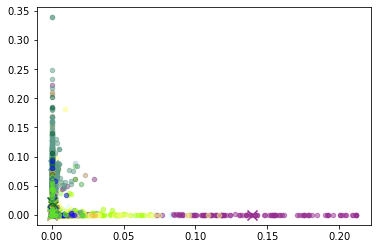

In [18]:
num_clusters = 20 # my original number of topics 
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)

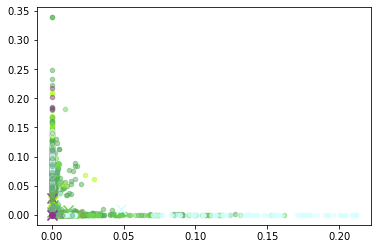

In [22]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)

## Find inertias

In [32]:
inertias = []

for k_ in np.arange(1, 10):
    km = KMeans(n_clusters=k_)
    km.fit(doc_topic)
    inertias.append(km.inertia_)

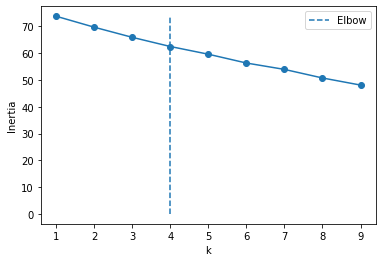

In [33]:
plt.plot(np.arange(1, 10), inertias, marker='o')
plt.vlines(x=4, ymin=0, ymax=max(inertias), ls='--', label='Elbow')
plt.ylabel("Inertia")
plt.xlabel('k')
plt.legend()
plt.;

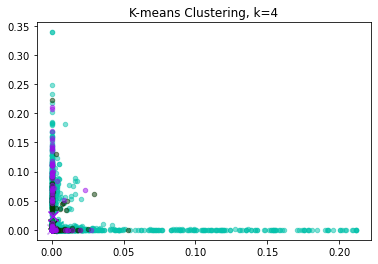

In [41]:
num_clusters = 4 #The elbow amount
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
plt.title('K-means Clustering, k=4')
display_cluster(doc_topic, km, num_clusters)
plt.savefig('4cluster.png')